In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
mlb_df = pd.read_csv('../data/clean_data/mlb_df_merged.csv')

In [10]:
len(mlb_df.columns)

69

In [11]:
mlb_df.corr().columns

Index(['game#', 'day', 'r', 'ra', 'innings', 'divison_rank', 'games_back',
       'attendance', 'streak', 'bat_hits', 'bat_rbi', 'bat_walks',
       'bat_strike_outs', 'hou_plate_app', 'bat_batting_avg', 'bat_obp',
       'bat_slg', 'bat_ops', 'pitch_opp_hits', 'pitch_walks',
       'pitch_strike_outs', 'pitch_opp_hr', 'pitch_era', 'pitch_batters_faced',
       'pitch_total_pitches', 'pitch_combined_strikes',
       'pitch_strikes_contacted', 'pitch_strikes_swinging',
       'pitch_strikes_looking', 'pitch_wpa', 'year', 'month', 'weekday',
       'wins', 'losses', 'total_games', 'win_pct', 'runs_pg_avg',
       'runs_mavg_5', 'runs_against_mavg_5', 'ten_game_win_perc', 'era_mavg_5',
       'bat_avg_mavg_5', 'ops_mavg_5', 'hits_pg_avg', 'hits_mavg_5',
       'bat_stkout_pg_avg', 'ptich_stkout_pg_avg', 'pitch_strkout_mavg_5',
       'opening_day', 'night_game', 'capacity', 'average_batter_age',
       'average_pitcher_age', 'est_payroll'],
      dtype='object')

In [62]:
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False).reset_index()
    print (feature_importances)
    return feature_importances



In [27]:
features = ['day', 'r', 'ra', 'divison_rank', 'games_back',
        'streak', 'bat_hits', 'bat_rbi', 'bat_walks',
       'bat_strike_outs', 'hou_plate_app', 'bat_batting_avg', 'bat_obp',
       'bat_slg', 'bat_ops', 'pitch_opp_hits', 'pitch_walks',
       'pitch_strike_outs', 'pitch_opp_hr', 'pitch_era', 'pitch_batters_faced',
        'pitch_wpa', 'year', 'month', 'weekday',
       'wins', 'losses', 'total_games', 'win_pct', 'runs_pg_avg',
       'runs_mavg_5', 'runs_against_mavg_5', 'ten_game_win_perc', 'era_mavg_5',
       'bat_avg_mavg_5', 'ops_mavg_5', 'hits_pg_avg', 'hits_mavg_5',
       'bat_stkout_pg_avg', 'ptich_stkout_pg_avg', 'pitch_strkout_mavg_5',
       'opening_day', 'night_game', 'capacity', 'average_batter_age',
       'average_pitcher_age', 'est_payroll']

In [28]:
X = mlb_df[features]

In [29]:
X.isna().sum()

day                     0
r                       0
ra                      0
divison_rank            0
games_back              0
streak                  0
bat_hits                0
bat_rbi                 0
bat_walks               0
bat_strike_outs         0
hou_plate_app           0
bat_batting_avg         0
bat_obp                 0
bat_slg                 0
bat_ops                 0
pitch_opp_hits          0
pitch_walks             0
pitch_strike_outs       0
pitch_opp_hr            0
pitch_era               0
pitch_batters_faced     0
pitch_wpa               0
year                    0
month                   0
weekday                 0
wins                    0
losses                  0
total_games             0
win_pct                 0
runs_pg_avg             0
runs_mavg_5             0
runs_against_mavg_5     0
ten_game_win_perc       0
era_mavg_5              0
bat_avg_mavg_5          0
ops_mavg_5              0
hits_pg_avg             0
hits_mavg_5             0
bat_stkout_p

In [32]:
X.shape

(59535, 47)

In [30]:
y = mlb_df['attendance']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4)

In [34]:
sc = StandardScaler()

In [36]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Linear Regression

In [37]:
linreg = LinearRegression()

In [38]:
linreg.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
linear_preds = linreg.predict(X_test_sc)
linear_score = r2_score(y_test, linear_preds)
linear_score

0.44037607715334726

In [42]:
cross_val_score(linreg, X_train_sc, y_train, cv = 5).mean()

0.445198114565423

In [48]:
resids = y_test - linear_preds

Text(0, 0.5, 'Residual Values: $y$')

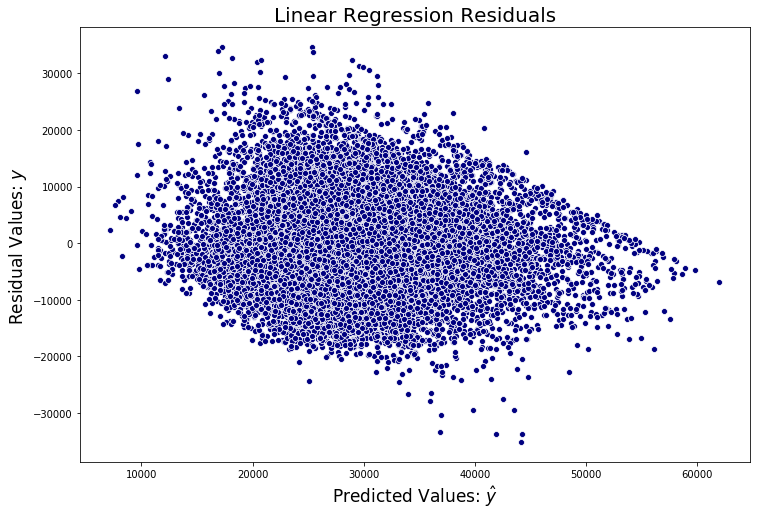

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(linear_preds, resids, color = '#000080')
plt.title("Linear Regression Residuals", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Residual Values: $y$", fontsize = 17)

Text(0, 0.5, 'Residual Values: $y$')

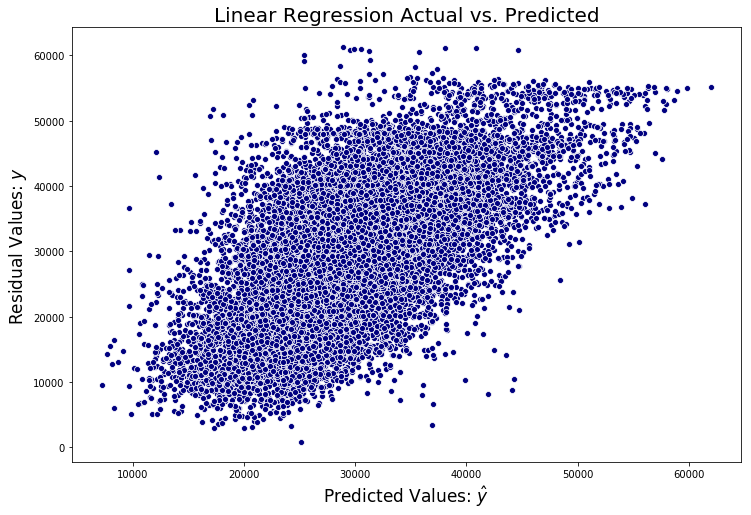

In [92]:
plt.figure(figsize=(12,8))
sns.scatterplot(linear_preds, y_test, color = '#000080')
plt.title("Linear Regression Actual vs. Predicted", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Residual Values: $y$", fontsize = 17)

### Decision Tree Regressor

In [71]:
dt = DecisionTreeRegressor()
dt_params={
    'max_depth':[3,4,5],
    'min_samples_split':[4,8,12],
    'min_samples_leaf':[5,10,15]
    }
gs_dt = GridSearchCV(dt, param_grid=dt_params, cv = 3, n_jobs=-1, verbose=1)
gs_dt.fit(X_train_sc, y_train)
print(gs_dt.best_score_) #cross val score
gs_dt.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    5.4s finished


0.44647784685650316


{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 4}

### Random Forrest Regressor

In [53]:
rf = RandomForestRegressor(n_estimators=250, n_jobs= 10, verbose=1)

In [54]:
rf.fit(X_train_sc, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   28.5s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:   38.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=10,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [56]:
rf_preds = rf.predict(X_test_sc)
rf.score(X_test_sc, y_test )
cross_val_score(rf, X_train_sc, y_train, cv=5).mean()

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   21.1s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:   28.9s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 18

0.7534869102735275

In [58]:
rf_resids = y_test - rf_preds

Text(0, 0.5, 'Residal Values: $y$')

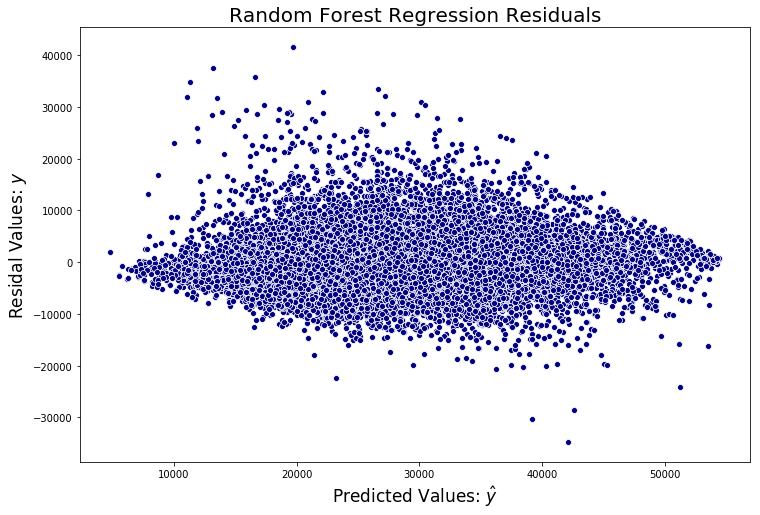

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(rf_preds, rf_resids, color = '#000080')
plt.title("Random Forest Regression Residuals", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Residal Values: $y$", fontsize = 17)

Text(0, 0.5, 'Actual Values: $y$')

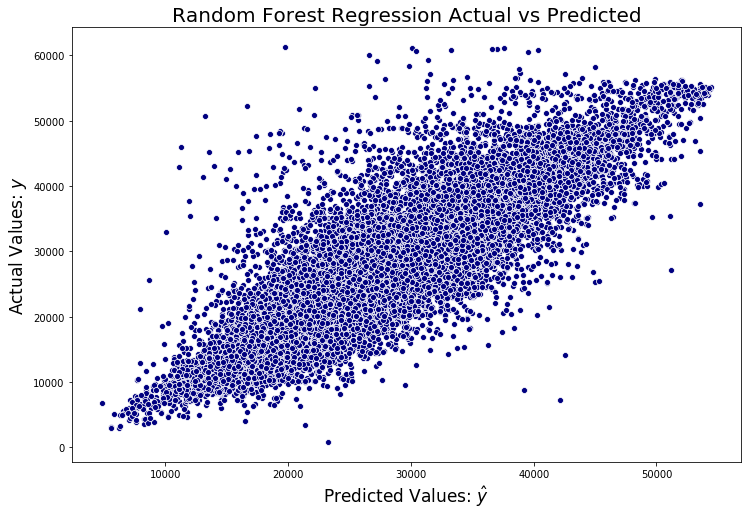

In [91]:
plt.figure(figsize=(12,8))
sns.scatterplot(rf_preds, y_test, color = '#000080')
plt.title("Random Forest Regression Actual vs Predicted", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Actual Values: $y$", fontsize = 17)

In [63]:
rf_feature_importance = feat_imp(rf)

                   index  importance
0            est_payroll    0.211289
1               capacity    0.115180
2     average_batter_age    0.108704
3    average_pitcher_age    0.079307
4                weekday    0.074337
5                   year    0.040563
6      bat_stkout_pg_avg    0.033757
7    ptich_stkout_pg_avg    0.031236
8            runs_pg_avg    0.027873
9                win_pct    0.023069
10           hits_pg_avg    0.022263
11           total_games    0.020546
12                  wins    0.019841
13            games_back    0.018743
14                losses    0.014913
15                   day    0.009391
16            era_mavg_5    0.008974
17  pitch_strkout_mavg_5    0.008095
18            ops_mavg_5    0.008024
19             pitch_wpa    0.007399
20        bat_avg_mavg_5    0.007174
21           runs_mavg_5    0.006040
22               bat_slg    0.005881
23   runs_against_mavg_5    0.005868
24               bat_obp    0.005780
25       bat_strike_outs    0.005631
2

### Gradient Boosting Regressor

In [73]:
gbr = GradientBoostingRegressor(n_estimators=300)

In [74]:
gbr.fit(X_train_sc, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
gbr_preds = gbr.predict(X_test_sc)
gbr_score = gbr.score(X_test_sc, y_test)
gbr_score

0.6906735961484155

In [ ]:
cross_val_score(gbr, X_train_sc, y_train, cv = 5).mean()

In [81]:
gbr_resids = y_test - gbr_preds

Text(0, 0.5, 'Residal Values: $y$')

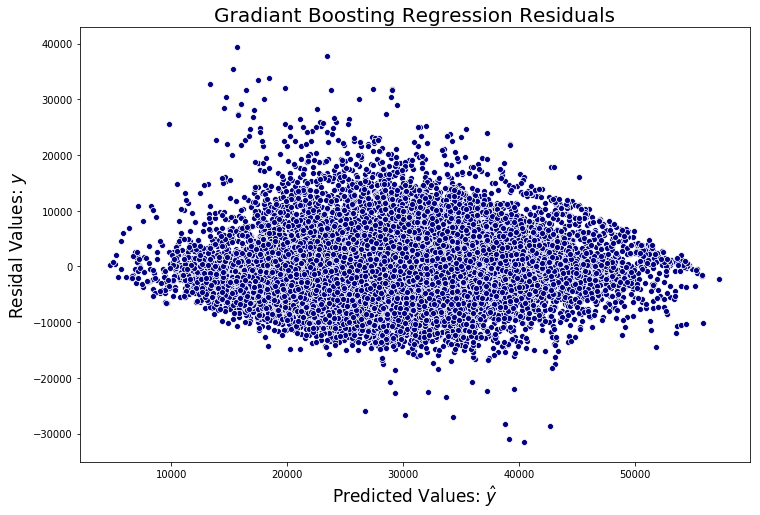

In [89]:
plt.figure(figsize=(12,8))
sns.scatterplot(gbr_preds, gbr_resids, color = '#000080')
plt.title("Gradiant Boosting Regression Residuals", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Residal Values: $y$", fontsize = 17)

Text(0, 0.5, 'Residal Values: $y$')

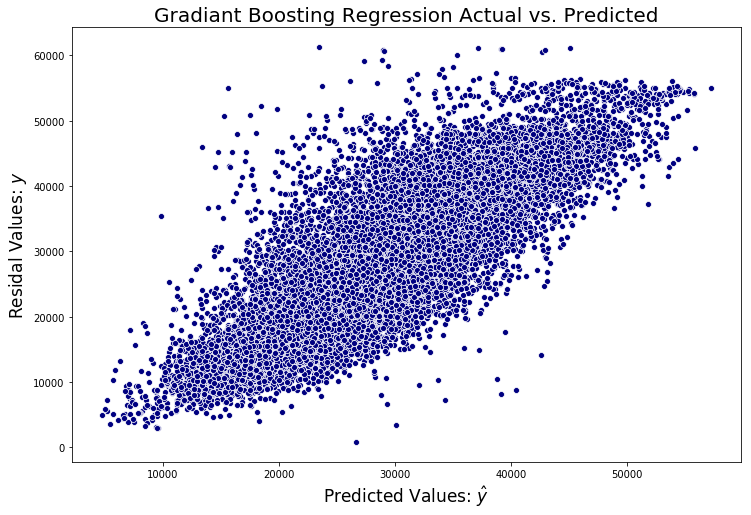

In [94]:
plt.figure(figsize=(12,8))
sns.scatterplot(gbr_preds, y_test, color = '#000080')
plt.title("Gradiant Boosting Regression Actual vs. Predicted", size= 20)
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 17)
plt.ylabel("Residal Values: $y$", fontsize = 17)

In [84]:
gbr_feature_importance= feat_imp(gbr)

                   index    importance
0            est_payroll  2.563841e-01
1               capacity  1.755714e-01
2    average_pitcher_age  1.301365e-01
3     average_batter_age  1.283453e-01
4                weekday  1.087253e-01
5                win_pct  3.620984e-02
6                   year  3.360753e-02
7                   wins  2.329640e-02
8             games_back  1.691941e-02
9            total_games  1.691697e-02
10     bat_stkout_pg_avg  1.422151e-02
11           hits_pg_avg  1.400125e-02
12   ptich_stkout_pg_avg  9.360743e-03
13           runs_pg_avg  7.750863e-03
14                losses  7.612448e-03
15            night_game  5.375668e-03
16          divison_rank  3.624971e-03
17           opening_day  3.285418e-03
18                 month  1.678738e-03
19                   day  1.336835e-03
20                streak  6.189438e-04
21            era_mavg_5  5.100702e-04
22           pitch_walks  4.976209e-04
23  pitch_strkout_mavg_5  4.373427e-04
24       bat_strike_outs 